# Preparation

In [1]:
import scanpy as sc
import mnmstpy as mnmst
import pandas as pd
import numpy as np
import os
import sys
from sklearn.metrics.cluster import adjusted_rand_score
import warnings
import src.logger as l
warnings.filterwarnings("ignore")

In [2]:
section_id = "151675"
input_dir = os.path.join('F:/UGIMC/Data/',section_id)
adata = sc.read_visium(path=input_dir, count_file=section_id+'_filtered_feature_bc_matrix.h5')

sc.pp.calculate_qc_metrics(adata, inplace=True)
adata = adata[:, adata.var['total_counts'] > 100]
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.filter_genes(adata, min_cells=1)
hvg_filter = adata.var['highly_variable']
sc.pp.normalize_total(adata, inplace=True)
adata = adata[:, hvg_filter]
display(adata)

View of AnnData object with n_obs × n_vars = 3592 × 3001
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'n_cells'
    uns: 'spatial', 'hvg'
    obsm: 'spatial'

In [3]:
enhanced_adata, cell_spatial = mnmst.data_enhance(adata, k_nei=6)


Median distance to closest cell = 138.00362314084367
num_nbrs: 3001


In [4]:
sc.pp.pca(enhanced_adata)
low_dim_x = enhanced_adata.obsm['X_pca']
expression = low_dim_x
spatial_network = cell_spatial

In [5]:
Ann_df = pd.read_csv(os.path.join('F:/UGIMC/Data', section_id, section_id+'_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']

In [6]:
adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'Ground Truth']

# Running stACN

In [7]:
import src.st_acn as stACN
import src.logger as l
output_data_path = "./Output/"
log_path = os.path.join(output_data_path, 'log')
l.initlog(log_path, )
l.logger.info(f'[call] run st_acn_master')
Z_all =  stACN.stACN(expression, spatial_network, lamb=0.001, dim=200)
l.logger.info(f'[call] run st_acn_master done')

2023-12-28 22:48:03,445 INFO 1728839949.py:6  :  [call] run st_acn_master
  0%|                                                                                                                                                           | 0/50 [00:00<?, ?it/s]2023-12-28 22:50:08,918 INFO stACN.py:54  :  [RunCSolver]iter = 0 calculate E
2023-12-28 22:50:16,396 INFO stACN.py:71  :  [RunCSolver]iter = 0 calculate E end
2023-12-28 22:50:16,768 INFO stACN.py:76  :  [RunCSolver]iter = 0 wshrinkObj
2023-12-28 22:50:22,647 INFO stACN.py:92  :  [RunCSolver]iter = 0 mu=0.0001
2023-12-28 22:50:22,666 INFO stACN.py:93  :  [RunCSolver]iter = 0 Ys[i]=2.785187834268409e-05
2023-12-28 22:50:22,692 INFO stACN.py:94  :  [RunCSolver]iter = 0 Yh[i]=2.785187834268409e-05
2023-12-28 22:50:23,225 INFO stACN.py:92  :  [RunCSolver]iter = 0 mu=0.0001
2023-12-28 22:50:23,237 INFO stACN.py:93  :  [RunCSolver]iter = 0 Ys[i]=2.5078791095772802e-05
2023-12-28 22:50:23,258 INFO stACN.py:94  :  [RunCSolver]iter = 0 Yh[i]

2023-12-28 22:52:31,034 INFO stACN.py:71  :  [RunCSolver]iter = 6 calculate E end
2023-12-28 22:52:31,438 INFO stACN.py:76  :  [RunCSolver]iter = 6 wshrinkObj
2023-12-28 22:52:36,992 INFO stACN.py:92  :  [RunCSolver]iter = 6 mu=0.0064
2023-12-28 22:52:37,005 INFO stACN.py:93  :  [RunCSolver]iter = 6 Ys[i]=0.0007072649542933525
2023-12-28 22:52:37,016 INFO stACN.py:94  :  [RunCSolver]iter = 6 Yh[i]=0.0007072649542933525
2023-12-28 22:52:37,541 INFO stACN.py:92  :  [RunCSolver]iter = 6 mu=0.0064
2023-12-28 22:52:37,552 INFO stACN.py:93  :  [RunCSolver]iter = 6 Ys[i]=0.0008831630115387671
2023-12-28 22:52:37,564 INFO stACN.py:94  :  [RunCSolver]iter = 6 Yh[i]=0.0008831630115387671
2023-12-28 22:52:37,566 INFO stACN.py:98  :  [RunCSolver]iter = 6 calculate  errp errs
2023-12-28 22:52:45,773 INFO stACN.py:103  :  [RunCSolver]iter = 6 max_err=1.4152806992731861
2023-12-28 22:52:45,775 INFO stACN.py:104  :  [RunCSolver]iter = 6 errs=0.9879383803664883
2023-12-28 22:52:45,776 INFO stACN.py:105

2023-12-28 22:54:46,407 INFO stACN.py:94  :  [RunCSolver]iter = 12 Yh[i]=0.005155253454740481
2023-12-28 22:54:46,860 INFO stACN.py:92  :  [RunCSolver]iter = 12 mu=0.4096
2023-12-28 22:54:46,871 INFO stACN.py:93  :  [RunCSolver]iter = 12 Ys[i]=0.011460453872762483
2023-12-28 22:54:46,883 INFO stACN.py:94  :  [RunCSolver]iter = 12 Yh[i]=0.011460453872762483
2023-12-28 22:54:46,884 INFO stACN.py:98  :  [RunCSolver]iter = 12 calculate  errp errs
2023-12-28 22:54:54,726 INFO stACN.py:103  :  [RunCSolver]iter = 12 max_err=0.15592588838784097
2023-12-28 22:54:54,728 INFO stACN.py:104  :  [RunCSolver]iter = 12 errs=0.15452826554678067
2023-12-28 22:54:54,729 INFO stACN.py:105  :  [RunCSolver]iter = 12 errp=0.001598205065077153
 26%|█████████████████████████████████████▉                                                                                                            | 13/50 [04:45<13:13, 21.44s/it]2023-12-28 22:54:54,733 INFO stACN.py:54  :  [RunCSolver]iter = 13 calculate E
2023-12-

2023-12-28 22:56:57,333 INFO stACN.py:94  :  [RunCSolver]iter = 18 Yh[i]=0.013508187078599366
2023-12-28 22:56:57,358 INFO stACN.py:98  :  [RunCSolver]iter = 18 calculate  errp errs
2023-12-28 22:57:05,022 INFO stACN.py:103  :  [RunCSolver]iter = 18 max_err=0.001723512372741718
2023-12-28 22:57:05,025 INFO stACN.py:104  :  [RunCSolver]iter = 18 errs=0.0017074036171116876
2023-12-28 22:57:05,026 INFO stACN.py:105  :  [RunCSolver]iter = 18 errp=2.1368663126041623e-05
 38%|███████████████████████████████████████████████████████▍                                                                                          | 19/50 [06:56<11:19, 21.91s/it]2023-12-28 22:57:05,030 INFO stACN.py:54  :  [RunCSolver]iter = 19 calculate E
2023-12-28 22:57:12,251 INFO stACN.py:71  :  [RunCSolver]iter = 19 calculate E end
2023-12-28 22:57:12,585 INFO stACN.py:76  :  [RunCSolver]iter = 19 wshrinkObj
2023-12-28 22:57:17,702 INFO stACN.py:92  :  [RunCSolver]iter = 19 mu=52.4288
2023-12-28 22:57:17,712 INFO 

2023-12-28 22:59:20,453 INFO stACN.py:104  :  [RunCSolver]iter = 24 errs=2.066015300026105e-05
2023-12-28 22:59:20,456 INFO stACN.py:105  :  [RunCSolver]iter = 24 errp=3.0089584061061853e-07
 50%|█████████████████████████████████████████████████████████████████████████                                                                         | 25/50 [09:11<09:39, 23.17s/it]2023-12-28 22:59:20,464 INFO stACN.py:54  :  [RunCSolver]iter = 25 calculate E
2023-12-28 22:59:29,700 INFO stACN.py:71  :  [RunCSolver]iter = 25 calculate E end
2023-12-28 22:59:30,170 INFO stACN.py:76  :  [RunCSolver]iter = 25 wshrinkObj
2023-12-28 22:59:35,426 INFO stACN.py:92  :  [RunCSolver]iter = 25 mu=3355.4432
2023-12-28 22:59:35,443 INFO stACN.py:93  :  [RunCSolver]iter = 25 Ys[i]=0.008259088241146998
2023-12-28 22:59:35,460 INFO stACN.py:94  :  [RunCSolver]iter = 25 Yh[i]=0.008259088241146998
2023-12-28 22:59:36,003 INFO stACN.py:92  :  [RunCSolver]iter = 25 mu=3355.4432
2023-12-28 22:59:36,018 INFO stACN.py:

# Clustering

In [8]:
import igraph as ig
import leidenalg
from natsort import natsorted
l.logger.info("[cluster] begin")
sources, targets = Z_all.nonzero()
ans_weight = Z_all[sources, targets]
g = ig.Graph(directed=True)
g.add_vertices(Z_all.shape[0])  # this adds adjacency.shape[0] vertices
g.add_edges(list(zip(sources, targets)))
g.es['weight'] = ans_weight

2023-12-28 23:01:22,455 INFO 842788194.py:4  :  [cluster] begin


In [13]:
# 尝试在学到的亲和图上直接执行leiden聚类算法。我们在单细胞上的聚类算法基本都失效了，也该尝试空间转录组领域的了。
partition_type = leidenalg.RBConfigurationVertexPartition
# clustering proper
partition_kwargs = {'weights': np.array(g.es['weight']).astype(np.float64), 'n_iterations': -1, 'seed': 42,'resolution_parameter': 1.28}

part = leidenalg.find_partition(g, partition_type, **partition_kwargs)
# store output into adata.obs
groups = np.array(part.membership)
leiden_label = pd.Categorical(
    values=groups.astype('U'),
    categories=natsorted(map(str, np.unique(groups))),
)
print(leiden_label)
adjusted_rand_score(pd.Categorical(adata.obs['Ground Truth']).codes, leiden_label)

['5', '0', '1', '2', '4', ..., '3', '1', '1', '4', '1']
Length: 3592
Categories (7, object): ['0', '1', '2', '3', '4', '5', '6']


0.62271224944669

In [14]:
adata.obs['stACN'] = leiden_label

In [15]:
from src.utils import refine

In [16]:
weights_adj = cell_spatial.A

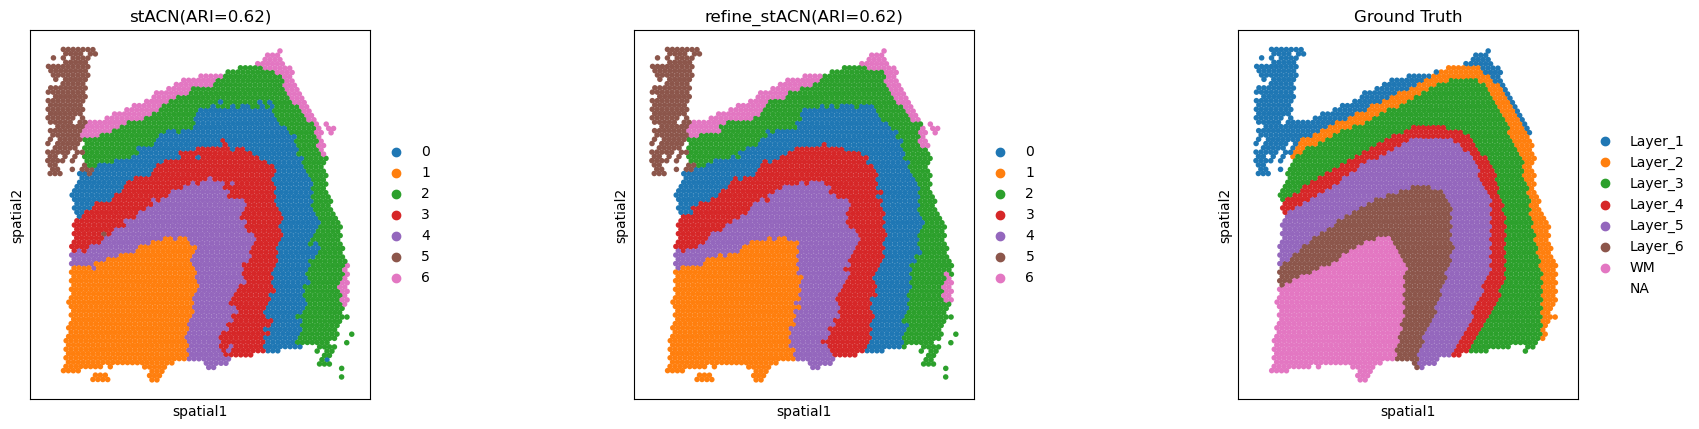

In [17]:
refined_pred = refine(sample_id=adata.obs.index.tolist(), pred=adata.obs['stACN'].tolist(),dis=weights_adj, shape="hexagon")
adata.obs["refined_pred"] = refined_pred
adata.obs["refined_pred"] = adata.obs["refined_pred"].astype('category')
stACN_ari = adjusted_rand_score(pd.Categorical(adata.obs['Ground Truth']).codes, adata.obs['stACN'])
refine_ari = adjusted_rand_score(pd.Categorical(adata.obs['Ground Truth']).codes, adata.obs['refined_pred'])
sc.pl.spatial(adata, color=['stACN', 'refined_pred', 'Ground Truth'], title=['stACN(ARI=%.2f)'% stACN_ari, 'refine_stACN(ARI=%.2f)'%refine_ari, 'Ground Truth'], alpha_img=0, size=1.6,save=section_id)